In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
from IPython.display import Image, display
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sn

mpl.rcParams["figure.figsize"] = (18,6)
mpl.rcParams["axes.grid"] = True

In [2]:
data = pd.read_csv('Sentiment_Analysis_Combined.csv')

In [3]:
data.head()

,Date,Adj Close,Label,Open,High,Low,Volume,Subjectivity,Polarity,compound,neg,pos,neu
0,2008-08-08,11734.320312,1,11432.089844,11759.959961,11388.040039,212830000,0.267549,-0.048568,-0.9982,0.235,0.041,0.724
1,2008-08-11,11782.349609,0,11729.669922,11867.110352,11675.530273,183190000,0.374806,0.121956,-0.9858,0.191,0.089,0.721
2,2008-08-12,11642.469727,0,11781.700195,11782.349609,11601.519531,173590000,0.536234,-0.044302,-0.9715,0.128,0.056,0.816
3,2008-08-13,11532.959961,1,11632.809570,11633.780273,11453.339844,182550000,0.364021,0.011398,-0.9809,0.146,0.066,0.788
4,2008-08-14,11615.929688,1,11532.070312,11718.280273,11450.889648,159790000,0.375099,0.040677,-0.9882,0.189,0.094,0.717


In [4]:
# df = data.drop(columns = ["Label"])
df = data
df.Date = pd.to_datetime(df.Date, infer_datetime_format=True)
df.head()

,Date,Adj Close,Label,Open,High,Low,Volume,Subjectivity,Polarity,compound,neg,pos,neu
0,2008-08-08,11734.320312,1,11432.089844,11759.959961,11388.040039,212830000,0.267549,-0.048568,-0.9982,0.235,0.041,0.724
1,2008-08-11,11782.349609,0,11729.669922,11867.110352,11675.530273,183190000,0.374806,0.121956,-0.9858,0.191,0.089,0.721
2,2008-08-12,11642.469727,0,11781.700195,11782.349609,11601.519531,173590000,0.536234,-0.044302,-0.9715,0.128,0.056,0.816
3,2008-08-13,11532.959961,1,11632.809570,11633.780273,11453.339844,182550000,0.364021,0.011398,-0.9809,0.146,0.066,0.788
4,2008-08-14,11615.929688,1,11532.070312,11718.280273,11450.889648,159790000,0.375099,0.040677,-0.9882,0.189,0.094,0.717


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1989 non-null   datetime64[ns]
 1   Adj Close     1989 non-null   float64       
 2   Label         1989 non-null   int64         
 3   Open          1989 non-null   float64       
 4   High          1989 non-null   float64       
 5   Low           1989 non-null   float64       
 6   Volume        1989 non-null   int64         
 7   Subjectivity  1989 non-null   float64       
 8   Polarity      1989 non-null   float64       
 9   compound      1989 non-null   float64       
 10  neg           1989 non-null   float64       
 11  pos           1989 non-null   float64       
 12  neu           1989 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(2)
memory usage: 202.1 KB


<AxesSubplot:xlabel='Date'>

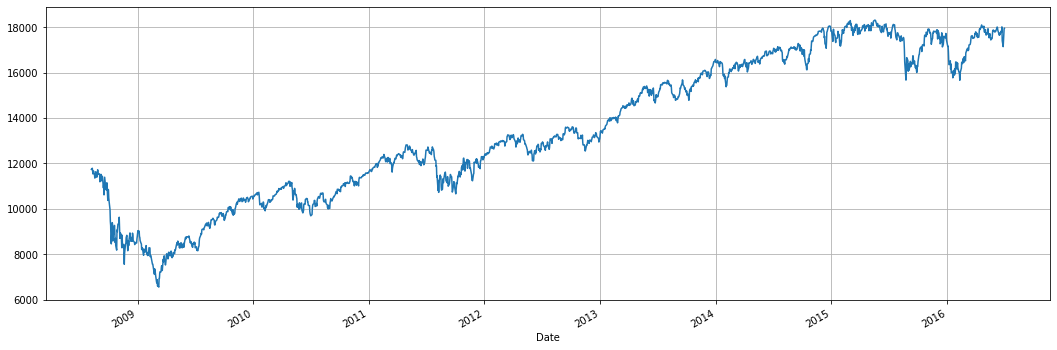

In [6]:
df.set_index('Date')["Adj Close"].plot()

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

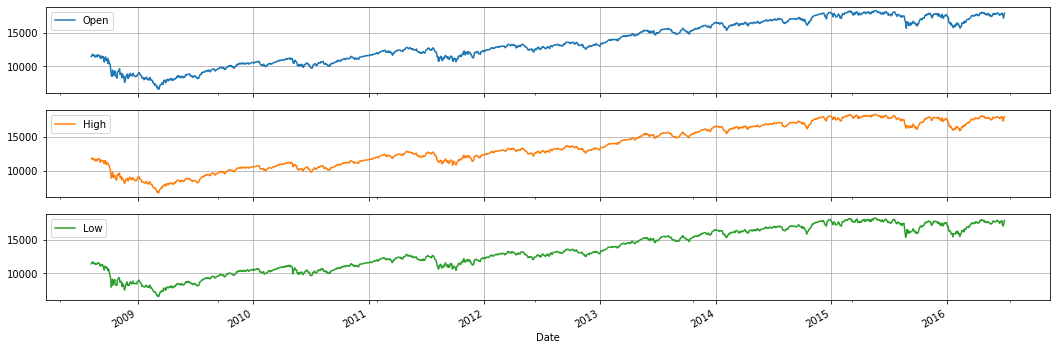

In [7]:
df.set_index('Date')[["Open", "High", "Low"]].plot(subplots=True)

In [8]:
df_input = df.drop(columns=["Date"])
df_input.head()

,Adj Close,Label,Open,High,Low,Volume,Subjectivity,Polarity,compound,neg,pos,neu
0,11734.320312,1,11432.089844,11759.959961,11388.040039,212830000,0.267549,-0.048568,-0.9982,0.235,0.041,0.724
1,11782.349609,0,11729.669922,11867.110352,11675.530273,183190000,0.374806,0.121956,-0.9858,0.191,0.089,0.721
2,11642.469727,0,11781.700195,11782.349609,11601.519531,173590000,0.536234,-0.044302,-0.9715,0.128,0.056,0.816
3,11532.959961,1,11632.809570,11633.780273,11453.339844,182550000,0.364021,0.011398,-0.9809,0.146,0.066,0.788
4,11615.929688,1,11532.070312,11718.280273,11450.889648,159790000,0.375099,0.040677,-0.9882,0.189,0.094,0.717


In [9]:
df_input.describe()

,Adj Close,Label,Open,High,Low,Volume,Subjectivity,Polarity,compound,neg,pos,neu
count,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000
mean,13463.032255,0.535445,13459.116048,13541.303173,13372.931728,1.628110e+08,0.361426,0.022722,-0.957369,0.162315,0.065675,0.772018
std,3144.006996,0.498867,3143.281634,3136.271725,3150.420934,9.392343e+07,0.060884,0.053687,0.199673,0.038575,0.020968,0.041819
min,6547.049805,0.000000,6547.009766,6709.609863,6469.950195,8.410000e+06,0.161332,-0.225978,-0.999500,0.059000,0.007000,0.588000
25%,10913.379883,0.000000,10907.339844,11000.980469,10824.759766,1.000000e+08,0.321410,-0.011461,-0.996400,0.135000,0.051000,0.746000
50%,13025.580078,1.000000,13022.049805,13088.110352,12953.129883,1.351700e+08,0.361652,0.024870,-0.993200,0.159000,0.064000,0.773000
75%,16478.410156,1.000000,16477.699219,16550.070312,16392.769531,1.926000e+08,0.400533,0.057980,-0.985500,0.188000,0.079000,0.802000
max,18312.390625,1.000000,18315.060547,18351.359375,18272.560547,6.749200e+08,0.615242,0.195774,0.991700,0.316000,0.153000,0.894000


In [10]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_input)

In [11]:
features = df_scaled
target = df_scaled[:,1]

<center>features is a 2D list, target is a 1D list

In [12]:
def plotHist(history : tf.keras.callbacks.History, val : str):
    plt.plot(history.history[val])
    plt.plot(history.history["val_" + val])
    plt.title(val[0].upper() + val[1:])
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'test'], loc='upper left')

In [13]:
len(features), len(features[0]), len(target)

(1989, 12, 1989)

In [14]:
df_input.head()

,Adj Close,Label,Open,High,Low,Volume,Subjectivity,Polarity,compound,neg,pos,neu
0,11734.320312,1,11432.089844,11759.959961,11388.040039,212830000,0.267549,-0.048568,-0.9982,0.235,0.041,0.724
1,11782.349609,0,11729.669922,11867.110352,11675.530273,183190000,0.374806,0.121956,-0.9858,0.191,0.089,0.721
2,11642.469727,0,11781.700195,11782.349609,11601.519531,173590000,0.536234,-0.044302,-0.9715,0.128,0.056,0.816
3,11532.959961,1,11632.809570,11633.780273,11453.339844,182550000,0.364021,0.011398,-0.9809,0.146,0.066,0.788
4,11615.929688,1,11532.070312,11718.280273,11450.889648,159790000,0.375099,0.040677,-0.9882,0.189,0.094,0.717


In [15]:
features[0]

array([4.40894198e-01, 1.00000000e+00, 4.15113783e-01, 4.33813671e-01,
       4.16695095e-01, 3.06702075e-01, 2.34004623e-01, 4.20649400e-01,
       6.52872640e-04, 6.84824903e-01, 2.32876712e-01, 4.44444444e-01])

In [16]:
target[0:2]

array([1., 0.])

In [17]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42, shuffle=False)

In [18]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1491, 12), (498, 12), (1491,), (498,))

In [21]:
np.save("x_train.npy", x_train)
np.save("x_test.npy", x_test)
np.save("y_train.npy", y_train)
np.save("y_test.npy", y_test)

In [40]:
win_len = 30
batch_size = 32
num_features = 12
train_generator = TimeseriesGenerator(x_train, y_train, length=win_len, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_len, sampling_rate=1, batch_size=batch_size)

In [41]:
print("number of batches in training set :", len(train_generator))
print("number of batches in testing set :", len(test_generator))
print("batch size :", len(train_generator[0][0]))
print("window size :", len(train_generator[0][0][0]))
print("number of features :", len(train_generator[0][0][0][0]))

number of batches in training set : 46
number of batches in testing set : 15
batch size : 32
window size : 30
number of features : 12


<center><h2>Making the Transformer model

In [44]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = tf.keras.layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = tf.keras.layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(res)
    x = tf.keras.layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = tf.keras.layers.Dropout(dropout)(x)
    x = tf.keras.layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

def build_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout=0, mlp_dropout=0):
    inputs = tf.keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = tf.keras.layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = tf.keras.layers.Dense(dim, activation="relu")(x)
        x = tf.keras.layers.Dropout(mlp_dropout)(x)
    outputs = tf.keras.layers.Dense(1)(x)
    return tf.keras.Model(inputs, outputs)

<center><h3>Model 1

In [45]:
input_shape = (win_len, num_features)

model1 = build_model(input_shape, head_size=256, num_heads=4, ff_dim=4, num_transformer_blocks=4, mlp_units=[128], 
                    mlp_dropout=0.4,dropout=0.25)

In [46]:
model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 30, 12)]     0           []                               
                                                                                                  
 layer_normalization_8 (LayerNo  (None, 30, 12)      24          ['input_2[0][0]']                
 rmalization)                                                                                     
                                                                                                  
 multi_head_attention_4 (MultiH  (None, 30, 12)      52236       ['layer_normalization_8[0][0]',  
 eadAttention)                                                    'layer_normalization_8[0][0]']  
                                                                                              

In [47]:
filepath = "clas_logs"
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode = "min")
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath+"\model1.hdf5", monitor = "val_accuracy", verbose = 1, save_best_only=True, mode = "max")

model1.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer=tf.optimizers.Adam(), metrics = ["accuracy"])

In [48]:
# history = model1.fit()
history1 = model1.fit_generator(train_generator, epochs=500, validation_data=test_generator, shuffle=False, callbacks=[checkpoint])

C:\Users\chinm\AppData\Local\Temp\ipykernel_14864\1154886279.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model1.fit_generator(train_generator, epochs=500, validation_data=test_generator, shuffle=False, callbacks=[checkpoint])


Epoch 1/500
46/46 [==============================] - ETA: 0s - loss: 2.1851 - accuracy: 0.5031
Epoch 1: val_accuracy improved from -inf to 0.48504, saving model to clas_logs\model1.hdf5
46/46 [==============================] - 18s 244ms/step - loss: 2.1851 - accuracy: 0.5031 - val_loss: 7.9432 - val_accuracy: 0.4850
Epoch 2/500
46/46 [==============================] - ETA: 0s - loss: 1.4614 - accuracy: 0.4716
Epoch 2: val_accuracy did not improve from 0.48504
46/46 [==============================] - 12s 262ms/step - loss: 1.4614 - accuracy: 0.4716 - val_loss: 0.8291 - val_accuracy: 0.4850
Epoch 3/500
46/46 [==============================] - ETA: 0s - loss: 1.5818 - accuracy: 0.4935
Epoch 3: val_accuracy did not improve from 0.48504
46/46 [==============================] - 11s 233ms/step - loss: 1.5818 - accuracy: 0.4935 - val_loss: 0.8607 - val_accuracy: 0.4850
Epoch 4/500
46/46 [==============================] - ETA: 0s - loss: 0.8453 - accuracy: 0.4798
Epoch 4: val_accuracy did not i

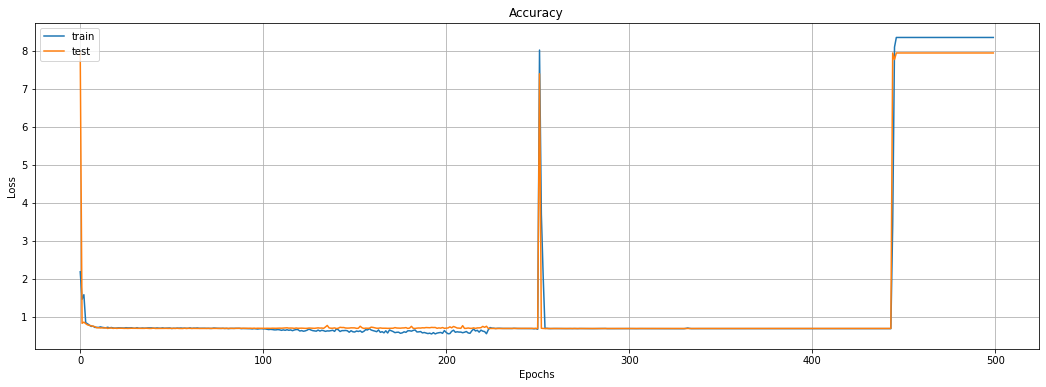

In [52]:
plotHist(history1, "loss")

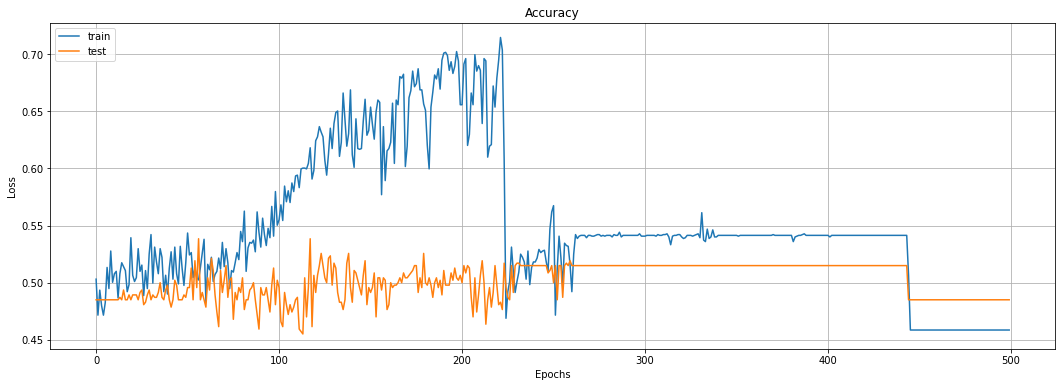

In [53]:
plotHist(history1, "accuracy")

In [54]:
model1 = tf.keras.models.load_model("clas_logs/model1.hdf5")

In [55]:
predictions = model1.predict(test_generator)

15/15 [==============================] - 2s 81ms/step


In [56]:
predictions

array([[0.5070445 ],
       [0.5129254 ],
       [0.49233088],
       [0.50744975],
       [0.5131613 ],
       [0.5003985 ],
       [0.51139987],
       [0.5023838 ],
       [0.49732736],
       [0.51426744],
       [0.5092882 ],
       [0.5009675 ],
       [0.49828815],
       [0.51232564],
       [0.5149995 ],
       [0.50421417],
       [0.5162239 ],
       [0.5118234 ],
       [0.5116885 ],
       [0.5101992 ],
       [0.51423365],
       [0.4958719 ],
       [0.5065216 ],
       [0.52139777],
       [0.5025226 ],
       [0.50931966],
       [0.5009912 ],
       [0.50723195],
       [0.50692916],
       [0.4926633 ],
       [0.5005424 ],
       [0.49314097],
       [0.49629954],
       [0.5130043 ],
       [0.49916658],
       [0.49509165],
       [0.48551086],
       [0.4874988 ],
       [0.4738722 ],
       [0.48950723],
       [0.50337875],
       [0.5090574 ],
       [0.5090512 ],
       [0.5078244 ],
       [0.5074581 ],
       [0.5176362 ],
       [0.5028125 ],
       [0.487

In [57]:
predictions.shape

(468, 1)

In [58]:
x_test[:,1][win_len:].shape

(468,)

In [59]:
df_pred = pd.concat([pd.DataFrame(np.round(predictions)), pd.DataFrame(x_test[:,1][win_len:])], axis = 1)
df_pred.columns = ["Pred", "Actual"]
df_pred.head()

,Pred,Actual
0,1.0,1.0
1,1.0,1.0
2,0.0,0.0
3,1.0,1.0
4,1.0,0.0


In [60]:
#function to print accuracy and MCC of the model
def evaluation(df : pd.DataFrame):
    conf = pd.crosstab(df["Actual"], df["Pred"])
    fig = plt.figure(figsize = (6,4))
    sn.heatmap(conf, annot = True, cmap = "Blues", fmt = "g")
    plt.title("Confussion Matrix")
    fig.tight_layout()
    plt.show()
    TP = conf[1][1]
    FN = conf[0][1]
    FP = conf[1][0]
    TN = conf[0][0]
    Acc = (TP+TN)/(TP+TN+FN+FP)
    Mcc = (TP*TN - FP*FN) / np.sqrt( (TP + FP)*(TP + FN)*(TN + FP)*(TN + FN) )
    print("Accuracy =",Acc)
    print("MCC =",Mcc)


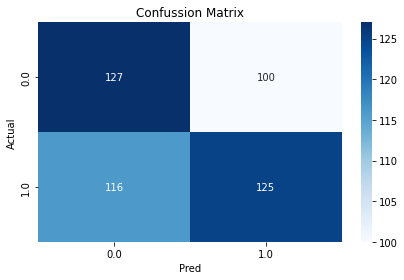

Accuracy = 0.5384615384615384
MCC = 0.07816642926518817


In [61]:
evaluation(df_pred)

<center><h3>Model 2

In [115]:
win_len = 60
batch_size = 32
num_features = 12
train_generator = TimeseriesGenerator(x_train, y_train, length=win_len, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_len, sampling_rate=1, batch_size=batch_size)

In [116]:
input_shape = (win_len, num_features)
model2 = build_model(input_shape, head_size=256, num_heads=4, ff_dim=4, num_transformer_blocks=4, mlp_units=[128], 
                    mlp_dropout=0,dropout=0)

In [117]:
print("number of batches in training set :", len(train_generator))
print("number of batches in testing set :", len(test_generator))
print("batch size :", len(train_generator[0][0]))
print("window size :", len(train_generator[0][0][0]))
print("number of features :", len(train_generator[0][0][0][0]))

number of batches in training set : 45
number of batches in testing set : 14
batch size : 32
window size : 60
number of features : 12


In [118]:
model2.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 60, 12)]     0           []                               
                                                                                                  
 layer_normalization_48 (LayerN  (None, 60, 12)      24          ['input_7[0][0]']                
 ormalization)                                                                                    
                                                                                                  
 multi_head_attention_24 (Multi  (None, 60, 12)      52236       ['layer_normalization_48[0][0]', 
 HeadAttention)                                                   'layer_normalization_48[0][0]'] 
                                                                                            

In [119]:
filepath = "clas_logs"
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode = "min")
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath+"\model2.hdf5", monitor = "val_accuracy", verbose = 1, save_best_only=True, mode = "max")

model2.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer=tf.optimizers.Adam(), metrics = ["accuracy"])

In [120]:
# history = model1.fit()
history2 = model2.fit_generator(train_generator, epochs=250, validation_data=test_generator, shuffle=False, callbacks=[checkpoint])

Epoch 1/250


C:\Users\chinm\AppData\Local\Temp\ipykernel_14864\2735662361.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2 = model2.fit_generator(train_generator, epochs=250, validation_data=test_generator, shuffle=False, callbacks=[checkpoint])


45/45 [==============================] - ETA: 0s - loss: 5.1465 - accuracy: 0.4563
Epoch 1: val_accuracy improved from -inf to 0.52740, saving model to clas_logs\model2.hdf5
45/45 [==============================] - 32s 595ms/step - loss: 5.1465 - accuracy: 0.4563 - val_loss: 0.6948 - val_accuracy: 0.5274
Epoch 2/250
45/45 [==============================] - ETA: 0s - loss: 0.7124 - accuracy: 0.5108
Epoch 2: val_accuracy did not improve from 0.52740
45/45 [==============================] - 26s 587ms/step - loss: 0.7124 - accuracy: 0.5108 - val_loss: 0.8466 - val_accuracy: 0.5183
Epoch 3/250
45/45 [==============================] - ETA: 0s - loss: 0.7148 - accuracy: 0.5038
Epoch 3: val_accuracy did not improve from 0.52740
45/45 [==============================] - 26s 585ms/step - loss: 0.7148 - accuracy: 0.5038 - val_loss: 0.7150 - val_accuracy: 0.5160
Epoch 4/250
45/45 [==============================] - ETA: 0s - loss: 0.7071 - accuracy: 0.5199
Epoch 4: val_accuracy did not improve from 

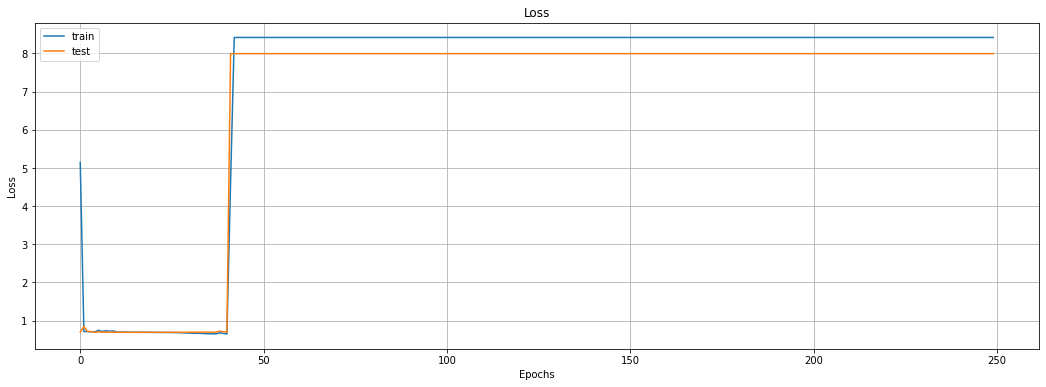

In [121]:
plotHist(history2, "loss")

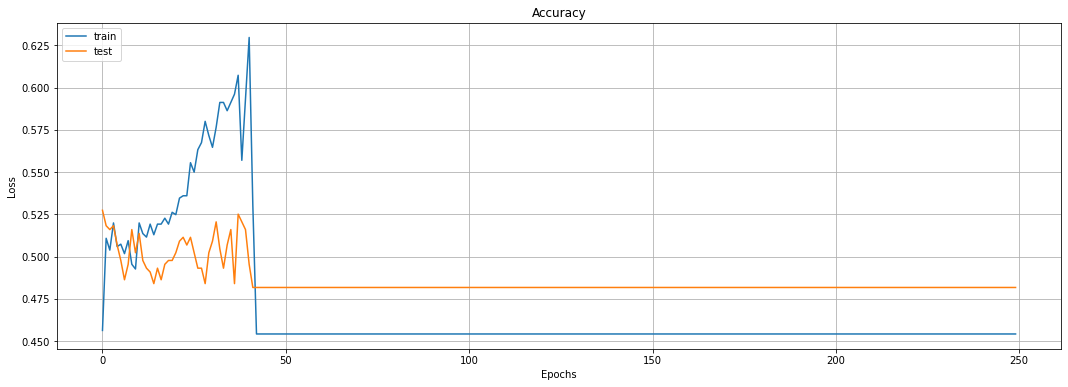

In [122]:
plotHist(history2, "accuracy")

In [123]:
model2 = tf.keras.models.load_model("clas_logs/model2.hdf5")

In [124]:
predictions = model2.predict(test_generator)

14/14 [==============================] - 3s 208ms/step


In [125]:
predictions

array([[0.5532271 ],
       [0.56594384],
       [0.553247  ],
       [0.5390502 ],
       [0.557002  ],
       [0.5978962 ],
       [0.5528537 ],
       [0.53329045],
       [0.50540346],
       [0.636373  ],
       [0.458526  ],
       [0.60942703],
       [0.48160034],
       [0.5062786 ],
       [0.56822926],
       [0.45053238],
       [0.48344266],
       [0.57741   ],
       [0.46294194],
       [0.45206696],
       [0.5196207 ],
       [0.49871743],
       [0.5567318 ],
       [0.46263742],
       [0.5784455 ],
       [0.52817094],
       [0.62523496],
       [0.48345727],
       [0.5265419 ],
       [0.52622104],
       [0.7613006 ],
       [0.5612562 ],
       [0.4653567 ],
       [0.5908492 ],
       [0.5362699 ],
       [0.50111413],
       [0.49079105],
       [0.57920134],
       [0.58936286],
       [0.5607614 ],
       [0.523786  ],
       [0.49351007],
       [0.4651006 ],
       [0.525511  ],
       [0.42069924],
       [0.5198643 ],
       [0.4726776 ],
       [0.558

In [126]:
df_pred = pd.concat([pd.DataFrame(np.round(predictions)), pd.DataFrame(x_test[:,1][win_len:])], axis = 1)
df_pred.columns = ["Pred", "Actual"]
df_pred.head()

,Pred,Actual
0,1.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


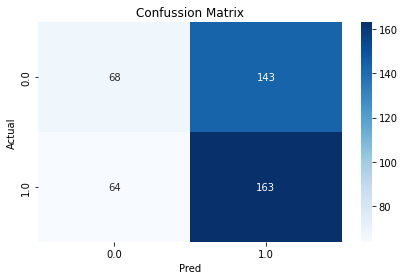

Accuracy = 0.5273972602739726
MCC = 0.04392434428956574


In [127]:
evaluation(df_pred)

<center><h3>Model 3

In [57]:
win_len = 60
batch_size = 32
num_features = 12
train_generator = TimeseriesGenerator(x_train, y_train, length=win_len, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_len, sampling_rate=1, batch_size=batch_size)

In [154]:
model3 = tf.keras.Sequential([
                                tf.keras.layers.LSTM(128, input_shape = (win_len, num_features), return_sequences=True),
                                tf.keras.layers.ReLU(),
                                tf.keras.layers.LSTM(128, return_sequences=True),
                                tf.keras.layers.ReLU(),
                                tf.keras.layers.Dropout(0.35),
                                tf.keras.layers.LSTM(64, return_sequences=False),
                                tf.keras.layers.Dropout(0.35),
                                tf.keras.layers.Dense(1, activation="sigmoid")
])

In [58]:
print("number of batches in training set :", len(train_generator))
print("number of batches in testing set :", len(test_generator))
print("batch size :", len(train_generator[0][0]))
print("window size :", len(train_generator[0][0][0]))
print("number of features :", len(train_generator[0][0][0][0]))

number of batches in training set : 45
number of batches in testing set : 14
batch size : 32
window size : 60
number of features : 12


In [156]:
model3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_33 (LSTM)              (None, 60, 128)           72192     
                                                                 
 re_lu_25 (ReLU)             (None, 60, 128)           0         
                                                                 
 lstm_34 (LSTM)              (None, 60, 128)           131584    
                                                                 
 re_lu_26 (ReLU)             (None, 60, 128)           0         
                                                                 
 dropout_26 (Dropout)        (None, 60, 128)           0         
                                                                 
 lstm_35 (LSTM)              (None, 64)                49408     
                                                                 
 dropout_27 (Dropout)        (None, 64)               

In [157]:
filepath = "clas_logs"
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode = "min")
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath+"\model3.hdf5", monitor = "val_accuracy", verbose = 1, save_best_only=True, mode = "max")

model3.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer=tf.optimizers.Adam(), metrics = ["accuracy"])

In [158]:
# history = model1.fit()
history = model3.fit_generator(train_generator, epochs=500, validation_data=test_generator, shuffle=False, callbacks=[checkpoint])

Epoch 1/500


C:\Users\chinm\AppData\Local\Temp\ipykernel_16696\2013185412.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model3.fit_generator(train_generator, epochs=500, validation_data=test_generator, shuffle=False, callbacks=[checkpoint])


45/45 [==============================] - ETA: 0s - loss: 0.6930 - accuracy: 0.5122
Epoch 1: val_accuracy improved from -inf to 0.51826, saving model to clas_logs\model3.hdf5
45/45 [==============================] - 6s 55ms/step - loss: 0.6930 - accuracy: 0.5122 - val_loss: 0.6984 - val_accuracy: 0.5183
Epoch 2/500
45/45 [==============================] - ETA: 0s - loss: 0.6917 - accuracy: 0.5346
Epoch 2: val_accuracy did not improve from 0.51826
45/45 [==============================] - 1s 27ms/step - loss: 0.6917 - accuracy: 0.5346 - val_loss: 0.6931 - val_accuracy: 0.5183
Epoch 3/500
43/45 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5407
Epoch 3: val_accuracy did not improve from 0.51826
45/45 [==============================] - 1s 22ms/step - loss: 0.6902 - accuracy: 0.5458 - val_loss: 0.6934 - val_accuracy: 0.5183
Epoch 4/500
43/45 [===========================>..] - ETA: 0s - loss: 0.6907 - accuracy: 0.5458
Epoch 4: val_accuracy did not improve from 0.5182

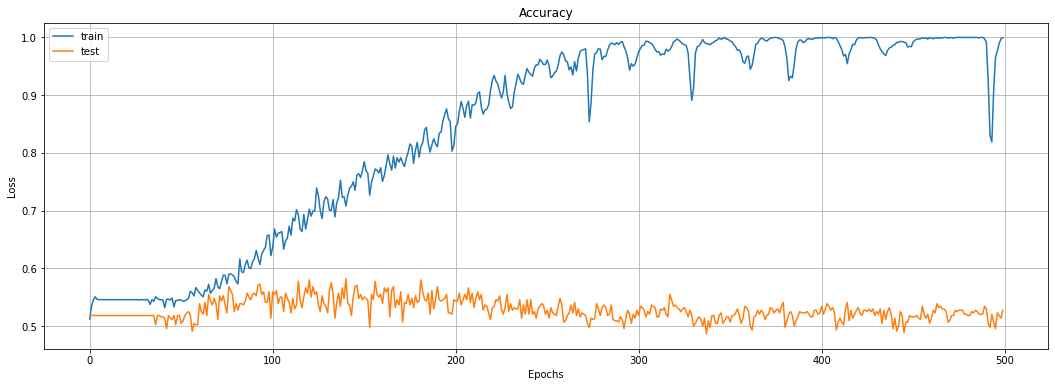

In [159]:
plotHist(history)

In [160]:
model3 = tf.keras.models.load_model("clas_logs/model3.hdf5")

In [161]:
predictions = model3.predict(test_generator)

14/14 [==============================] - 1s 17ms/step


In [162]:
df_pred = pd.concat([pd.DataFrame(np.round(predictions)), pd.DataFrame(x_test[:,1][win_len:])], axis = 1)
df_pred.columns = ["Pred", "Actual"]
df_pred.head()

,Pred,Actual
0,1.0,1.0
1,0.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


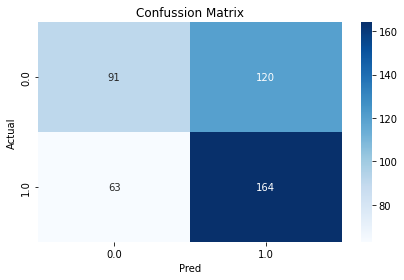

Accuracy = 0.5821917808219178
MCC = 0.16089409050423598


In [163]:
evaluation(df_pred)

<center><h3>Model 4

In [62]:
win_len = 60
batch_size = 32
num_features = 12
train_generator = TimeseriesGenerator(x_train, y_train, length=win_len, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_len, sampling_rate=1, batch_size=batch_size)

In [63]:
model4 = tf.keras.Sequential([
                                tf.keras.layers.LSTM(256, input_shape = (win_len, num_features), return_sequences=True),
                                tf.keras.layers.ReLU(),
                                tf.keras.layers.Dropout(0.15),
                                tf.keras.layers.LSTM(256, return_sequences=True),
                                tf.keras.layers.ReLU(),
                                tf.keras.layers.Dropout(0.15),
                                tf.keras.layers.LSTM(128, return_sequences=True),
                                tf.keras.layers.ReLU(),
                                tf.keras.layers.Dropout(0.2),
                                tf.keras.layers.LSTM(64, return_sequences=False),
                                tf.keras.layers.Dropout(0.2),
                                tf.keras.layers.Dense(1, activation="sigmoid")
])

In [64]:
print("number of batches in training set :", len(train_generator))
print("number of batches in testing set :", len(test_generator))
print("batch size :", len(train_generator[0][0]))
print("window size :", len(train_generator[0][0][0]))
print("number of features :", len(train_generator[0][0][0][0]))

number of batches in training set : 45
number of batches in testing set : 14
batch size : 32
window size : 60
number of features : 12


In [65]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 60, 256)           275456    
                                                                 
 re_lu_9 (ReLU)              (None, 60, 256)           0         
                                                                 
 dropout_10 (Dropout)        (None, 60, 256)           0         
                                                                 
 lstm_14 (LSTM)              (None, 60, 256)           525312    
                                                                 
 re_lu_10 (ReLU)             (None, 60, 256)           0         
                                                                 
 dropout_11 (Dropout)        (None, 60, 256)           0         
                                                                 
 lstm_15 (LSTM)              (None, 60, 128)          

In [66]:
filepath = "clas_logs"
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode = "min")
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath+"\model4.hdf5", monitor = "val_accuracy", verbose = 1, save_best_only=True, mode = "max")

model4.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer=tf.optimizers.Adam(), metrics = ["accuracy"])v

In [67]:
# history = model1.fit()
history = model4.fit_generator(train_generator, epochs=500, validation_data=test_generator, shuffle=False, callbacks=[checkpoint])

Epoch 1/500


C:\Users\chinm\AppData\Local\Temp\ipykernel_16696\3266553432.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model4.fit_generator(train_generator, epochs=500, validation_data=test_generator, shuffle=False, callbacks=[checkpoint])


44/45 [============================>.] - ETA: 0s - loss: 0.6937 - accuracy: 0.5384
Epoch 1: val_accuracy improved from -inf to 0.51826, saving model to clas_logs\model4.hdf5
45/45 [==============================] - 8s 71ms/step - loss: 0.6934 - accuracy: 0.5395 - val_loss: 0.6945 - val_accuracy: 0.5183
Epoch 2/500
45/45 [==============================] - ETA: 0s - loss: 0.6910 - accuracy: 0.5409
Epoch 2: val_accuracy did not improve from 0.51826
45/45 [==============================] - 1s 31ms/step - loss: 0.6910 - accuracy: 0.5409 - val_loss: 0.6933 - val_accuracy: 0.5183
Epoch 3/500
44/45 [============================>.] - ETA: 0s - loss: 0.6903 - accuracy: 0.5447
Epoch 3: val_accuracy did not improve from 0.51826
45/45 [==============================] - 1s 31ms/step - loss: 0.6901 - accuracy: 0.5458 - val_loss: 0.6928 - val_accuracy: 0.5183
Epoch 4/500
44/45 [============================>.] - ETA: 0s - loss: 0.6906 - accuracy: 0.5447
Epoch 4: val_accuracy did not improve from 0.5182

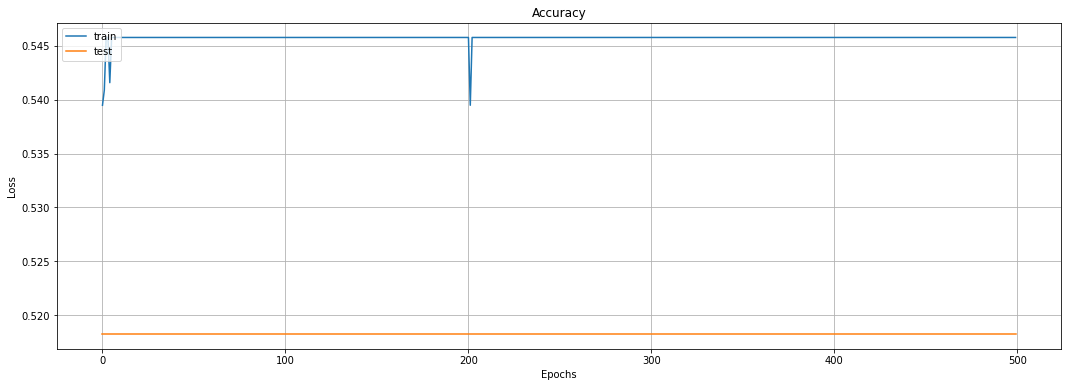

In [68]:
plotHist(history)

In [69]:
model4 = tf.keras.models.load_model("clas_logs/model4.hdf5")

In [70]:
predictions = model4.predict(test_generator)

14/14 [==============================] - 1s 18ms/step


In [74]:
df_pred = pd.concat([pd.DataFrame(np.round(predictions)), pd.DataFrame(x_test[:,1][win_len:])], axis = 1)
df_pred.columns = ["Pred", "Actual"]
df_pred.head()

,Pred,Actual
0,1.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [82]:
df_pred.sum()

Pred      438.0
Actual    227.0
dtype: float64

<center><h3>Model 5

In [83]:
win_len = 60
batch_size = 32
num_features = 12
train_generator = TimeseriesGenerator(x_train, y_train, length=win_len, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_len, sampling_rate=1, batch_size=batch_size)

In [84]:
model5 = tf.keras.Sequential([
                                tf.keras.layers.LSTM(256, input_shape = (win_len, num_features), return_sequences=True),
                                tf.keras.layers.ReLU(),
                                tf.keras.layers.Dropout(0.1),
                                tf.keras.layers.LSTM(256, return_sequences=True),
                                tf.keras.layers.ReLU(),
                                tf.keras.layers.Dropout(0.1),
                                tf.keras.layers.LSTM(128, return_sequences=True),
                                tf.keras.layers.ReLU(),
                                tf.keras.layers.Dropout(0.1),
                                tf.keras.layers.LSTM(64, return_sequences=False),
                                tf.keras.layers.ReLU(),
                                tf.keras.layers.Dense(1, activation="sigmoid")
])

In [85]:
print("number of batches in training set :", len(train_generator))
print("number of batches in testing set :", len(test_generator))
print("batch size :", len(train_generator[0][0]))
print("window size :", len(train_generator[0][0][0]))
print("number of features :", len(train_generator[0][0][0][0]))

number of batches in training set : 45
number of batches in testing set : 14
batch size : 32
window size : 60
number of features : 12


In [86]:
model5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 60, 256)           275456    
                                                                 
 re_lu_12 (ReLU)             (None, 60, 256)           0         
                                                                 
 dropout_14 (Dropout)        (None, 60, 256)           0         
                                                                 
 lstm_18 (LSTM)              (None, 60, 256)           525312    
                                                                 
 re_lu_13 (ReLU)             (None, 60, 256)           0         
                                                                 
 dropout_15 (Dropout)        (None, 60, 256)           0         
                                                                 
 lstm_19 (LSTM)              (None, 60, 128)          

In [87]:
filepath = "clas_logs"
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode = "min")
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath+"\model5.hdf5", monitor = "val_accuracy", verbose = 1, save_best_only=True, mode = "max")

model5.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer=tf.optimizers.Adam(), metrics = ["accuracy"])

In [88]:
# history = model1.fit()
history = model5.fit_generator(train_generator, epochs=500, validation_data=test_generator, shuffle=False, callbacks=[checkpoint])

Epoch 1/500


C:\Users\chinm\AppData\Local\Temp\ipykernel_16696\140577403.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model5.fit_generator(train_generator, epochs=500, validation_data=test_generator, shuffle=False, callbacks=[checkpoint])


43/45 [===========================>..] - ETA: 0s - loss: 0.6933 - accuracy: 0.5254
Epoch 1: val_accuracy improved from -inf to 0.51826, saving model to clas_logs\model5.hdf5
45/45 [==============================] - 8s 65ms/step - loss: 0.6927 - accuracy: 0.5311 - val_loss: 0.6947 - val_accuracy: 0.5183
Epoch 2/500
44/45 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5426
Epoch 2: val_accuracy did not improve from 0.51826
45/45 [==============================] - 1s 31ms/step - loss: 0.6912 - accuracy: 0.5437 - val_loss: 0.6940 - val_accuracy: 0.5183
Epoch 3/500
44/45 [============================>.] - ETA: 0s - loss: 0.6908 - accuracy: 0.5362
Epoch 3: val_accuracy did not improve from 0.51826
45/45 [==============================] - 1s 30ms/step - loss: 0.6907 - accuracy: 0.5374 - val_loss: 0.6943 - val_accuracy: 0.5183
Epoch 4/500
45/45 [==============================] - ETA: 0s - loss: 0.6909 - accuracy: 0.5311
Epoch 4: val_accuracy did not improve from 0.5182

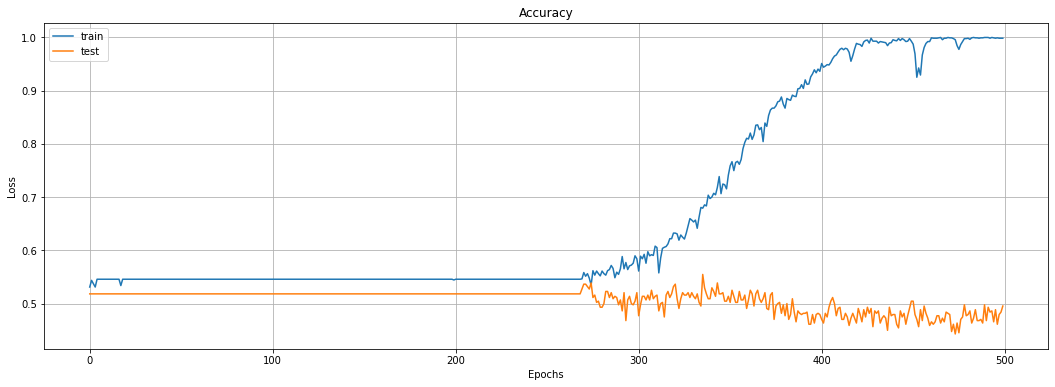

In [89]:
plotHist(history)

In [90]:
model5 = tf.keras.models.load_model("clas_logs/model5.hdf5")

In [91]:
predictions = model5.predict(test_generator)

14/14 [==============================] - 1s 18ms/step


In [92]:
df_pred = pd.concat([pd.DataFrame(np.round(predictions)), pd.DataFrame(x_test[:,1][win_len:])], axis = 1)
df_pred.columns = ["Pred", "Actual"]
df_pred.head()

,Pred,Actual
0,0.0,1.0
1,0.0,0.0
2,0.0,0.0
3,1.0,0.0
4,1.0,0.0


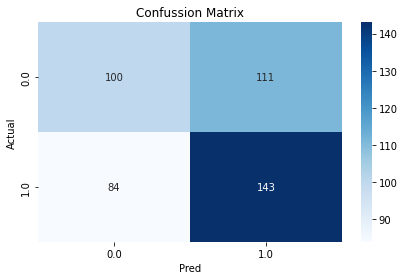

Accuracy = 0.5547945205479452
MCC = 0.10517207576884334


In [93]:
evaluation(df_pred)

<center><h3>Model 6

In [94]:
win_len = 100
batch_size = 32
num_features = 12
train_generator = TimeseriesGenerator(x_train, y_train, length=win_len, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_len, sampling_rate=1, batch_size=batch_size)

In [95]:
model6 = tf.keras.Sequential([
                                tf.keras.layers.LSTM(128, input_shape = (win_len, num_features), return_sequences=True),
                                tf.keras.layers.ReLU(),
                                tf.keras.layers.Dropout(0.1),
                                tf.keras.layers.LSTM(128, return_sequences=True),
                                tf.keras.layers.ReLU(),
                                tf.keras.layers.Dropout(0.1),
                                tf.keras.layers.LSTM(64, return_sequences=True),
                                tf.keras.layers.ReLU(),
                                tf.keras.layers.Dropout(0.1),
                                tf.keras.layers.LSTM(64, return_sequences=True),
                                tf.keras.layers.ReLU(),
                                tf.keras.layers.Dropout(0.1),
                                tf.keras.layers.LSTM(32, return_sequences=True),
                                tf.keras.layers.ReLU(),
                                tf.keras.layers.Dropout(0.1),
                                tf.keras.layers.LSTM(32, return_sequences=False),
                                tf.keras.layers.Dense(1, activation="sigmoid")
])

In [96]:
print("number of batches in training set :", len(train_generator))
print("number of batches in testing set :", len(test_generator))
print("batch size :", len(train_generator[0][0]))
print("window size :", len(train_generator[0][0][0]))
print("number of features :", len(train_generator[0][0][0][0]))

number of batches in training set : 44
number of batches in testing set : 13
batch size : 32
window size : 100
number of features : 12


In [97]:
model6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 100, 128)          72192     
                                                                 
 re_lu_16 (ReLU)             (None, 100, 128)          0         
                                                                 
 dropout_17 (Dropout)        (None, 100, 128)          0         
                                                                 
 lstm_22 (LSTM)              (None, 100, 128)          131584    
                                                                 
 re_lu_17 (ReLU)             (None, 100, 128)          0         
                                                                 
 dropout_18 (Dropout)        (None, 100, 128)          0         
                                                                 
 lstm_23 (LSTM)              (None, 100, 64)          

In [98]:
filepath = "clas_logs"
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode = "min")
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath+"\model6.hdf5", monitor = "val_accuracy", verbose = 1, save_best_only=True, mode = "max")

model6.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer=tf.optimizers.Adam(), metrics = ["accuracy"])

In [99]:
# history = model1.fit()
history = model6.fit_generator(train_generator, epochs=500, validation_data=test_generator, shuffle=False, callbacks=[checkpoint])

Epoch 1/500


C:\Users\chinm\AppData\Local\Temp\ipykernel_16696\2576489773.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model6.fit_generator(train_generator, epochs=500, validation_data=test_generator, shuffle=False, callbacks=[checkpoint])


44/44 [==============================] - ETA: 0s - loss: 0.6926 - accuracy: 0.5255
Epoch 1: val_accuracy improved from -inf to 0.50503, saving model to clas_logs\model6.hdf5
44/44 [==============================] - 12s 97ms/step - loss: 0.6926 - accuracy: 0.5255 - val_loss: 0.6939 - val_accuracy: 0.5050
Epoch 2/500
44/44 [==============================] - ETA: 0s - loss: 0.6901 - accuracy: 0.5471
Epoch 2: val_accuracy did not improve from 0.50503
44/44 [==============================] - 2s 55ms/step - loss: 0.6901 - accuracy: 0.5471 - val_loss: 0.6946 - val_accuracy: 0.5050
Epoch 3/500
43/44 [============================>.] - ETA: 0s - loss: 0.6898 - accuracy: 0.5472
Epoch 3: val_accuracy did not improve from 0.50503
44/44 [==============================] - 2s 53ms/step - loss: 0.6898 - accuracy: 0.5471 - val_loss: 0.6944 - val_accuracy: 0.5050
Epoch 4/500
43/44 [============================>.] - ETA: 0s - loss: 0.6894 - accuracy: 0.5472
Epoch 4: val_accuracy did not improve from 0.505

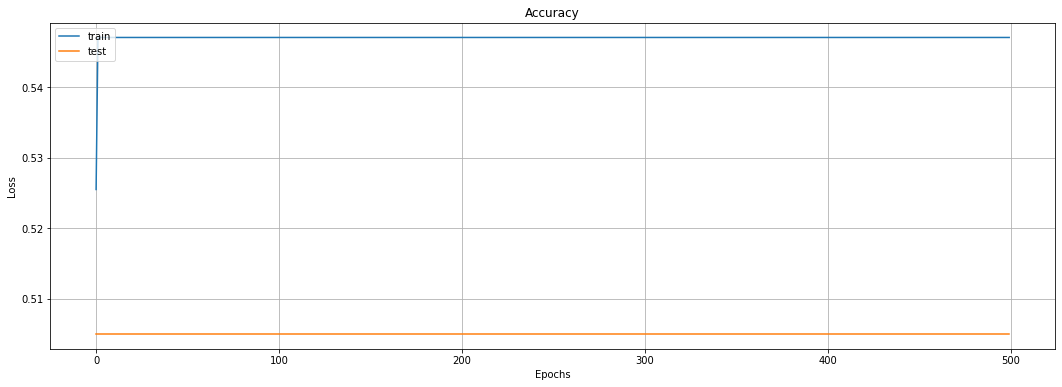

In [100]:
plotHist(history)

In [101]:
model6 = tf.keras.models.load_model("clas_logs/model6.hdf5")

In [102]:
predictions = model6.predict(test_generator)

13/13 [==============================] - 2s 34ms/step


In [103]:
df_pred = pd.concat([pd.DataFrame(np.round(predictions)), pd.DataFrame(x_test[:,1][win_len:])], axis = 1)
df_pred.columns = ["Pred", "Actual"]
df_pred.head()

,Pred,Actual
0,1.0,0.0
1,1.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


<center><h3>Model 7

In [170]:
win_len = 300
batch_size = 32
num_features = 12
train_generator = TimeseriesGenerator(x_train, y_train, length=win_len, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_len, sampling_rate=1, batch_size=batch_size)

In [171]:
model7 = tf.keras.Sequential([
                                tf.keras.layers.LSTM(128, input_shape = (win_len, num_features), return_sequences=True),
                                tf.keras.layers.ReLU(),
                                tf.keras.layers.LSTM(128, return_sequences=True),
                                tf.keras.layers.ReLU(),
                                tf.keras.layers.Dropout(0.35),
                                tf.keras.layers.LSTM(64, return_sequences=False),
                                tf.keras.layers.Dropout(0.35),
                                tf.keras.layers.Dense(1, activation="sigmoid")
])

In [172]:
print("number of batches in training set :", len(train_generator))
print("number of batches in testing set :", len(test_generator))
print("batch size :", len(train_generator[0][0]))
print("window size :", len(train_generator[0][0][0]))
print("number of features :", len(train_generator[0][0][0][0]))

number of batches in training set : 38
number of batches in testing set : 7
batch size : 32
window size : 300
number of features : 12


In [173]:
model7.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_39 (LSTM)              (None, 300, 128)          72192     
                                                                 
 re_lu_29 (ReLU)             (None, 300, 128)          0         
                                                                 
 lstm_40 (LSTM)              (None, 300, 128)          131584    
                                                                 
 re_lu_30 (ReLU)             (None, 300, 128)          0         
                                                                 
 dropout_30 (Dropout)        (None, 300, 128)          0         
                                                                 
 lstm_41 (LSTM)              (None, 64)                49408     
                                                                 
 dropout_31 (Dropout)        (None, 64)              

In [174]:
filepath = "clas_logs"
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode = "min")
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath+"\model7.hdf5", monitor = "val_accuracy", verbose = 1, save_best_only=True, mode = "max")

model7.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer=tf.optimizers.Adam(), metrics = ["accuracy"])

In [175]:
# history = model1.fit()
history = model7.fit_generator(train_generator, epochs=500, validation_data=test_generator, shuffle=False, callbacks=[checkpoint])

C:\Users\chinm\AppData\Local\Temp\ipykernel_16696\1090714950.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model7.fit_generator(train_generator, epochs=500, validation_data=test_generator, shuffle=False, callbacks=[checkpoint])


Epoch 1/500
38/38 [==============================] - ETA: 0s - loss: 0.6925 - accuracy: 0.5365
Epoch 1: val_accuracy improved from -inf to 0.53535, saving model to clas_logs\model7.hdf5
38/38 [==============================] - 16s 164ms/step - loss: 0.6925 - accuracy: 0.5365 - val_loss: 0.6911 - val_accuracy: 0.5354
Epoch 2/500
38/38 [==============================] - ETA: 0s - loss: 0.6915 - accuracy: 0.5466
Epoch 2: val_accuracy did not improve from 0.53535
38/38 [==============================] - 4s 119ms/step - loss: 0.6915 - accuracy: 0.5466 - val_loss: 0.6908 - val_accuracy: 0.5354
Epoch 3/500
37/38 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5498
Epoch 3: val_accuracy did not improve from 0.53535
38/38 [==============================] - 4s 94ms/step - loss: 0.6910 - accuracy: 0.5500 - val_loss: 0.6908 - val_accuracy: 0.5354
Epoch 4/500
38/38 [==============================] - ETA: 0s - loss: 0.6892 - accuracy: 0.5500
Epoch 4: val_accuracy did not impr

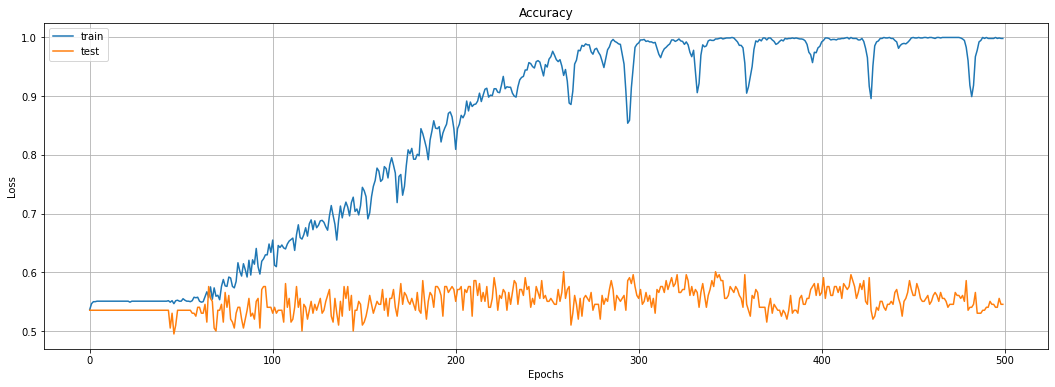

In [176]:
plotHist(history)

In [177]:
model7 = tf.keras.models.load_model("clas_logs/model7.hdf5")

In [178]:
predictions = model3.predict(test_generator)

7/7 [==============================] - 2s 47ms/step


In [179]:
df_pred = pd.concat([pd.DataFrame(np.round(predictions)), pd.DataFrame(x_test[:,1][win_len:])], axis = 1)
df_pred.columns = ["Pred", "Actual"]
df_pred.head()

,Pred,Actual
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,1.0
4,0.0,0.0


In [182]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pred    198 non-null    float32
 1   Actual  198 non-null    float64
dtypes: float32(1), float64(1)
memory usage: 2.4 KB


In [181]:
df_pred.sum()

Pred        0.0
Actual    106.0
dtype: float64